In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/customer_purchase_data.csv')
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [9]:
X=df.iloc[:,0:8]
y=df.iloc[:,-1]

In [10]:
X.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,40,1,66120.267939,8,0,30.568601,0,5
1,20,1,23579.773583,4,2,38.240097,0,5
2,27,1,127821.306432,11,2,31.633212,1,0
3,24,1,137798.623120,19,3,46.167059,0,4
4,31,1,99300.964220,19,1,19.823592,0,0


In [11]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: PurchaseStatus, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-0.27676055,  0.99070982, -0.48193427, ...,  0.00586386,
        -0.69652603,  1.43417244],
       [-1.56441822,  0.99070982, -1.61282066, ...,  0.45769362,
        -0.69652603,  1.43417244],
       [-1.11373803,  0.99070982,  1.15831147, ...,  0.06856645,
         1.43569652, -1.49909543],
       ...,
       [-0.27676055,  0.99070982, -0.71472882, ..., -1.07564035,
        -0.69652603, -1.49909543],
       [ 1.20404576, -1.0093773 ,  1.32314327, ...,  0.40300974,
         1.43569652, -1.49909543],
       [ 0.36706828, -1.0093773 , -0.84067156, ..., -0.30161405,
         1.43569652,  0.84751886]])

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Model without Regulaizer

In [14]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [19]:
model1 = Sequential()

model1.add(Dense(128,input_dim=8, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1152      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17793 (69.50 KB)
Trainable params: 17793 (69.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
38/38 [==============================] - 2s 12ms/step - loss: 0.4765 - accuracy: 0.7842 - val_loss: 0.3933 - val_accuracy: 0.8333
Epoch 2/500
38/38 [==============================] - 0s 4ms/step - loss: 0.3994 - accuracy: 0.8450 - val_loss: 0.3990 - val_accuracy: 0.8433
Epoch 3/500
38/38 [==============================] - 0s 4ms/step - loss: 0.3632 - accuracy: 0.8692 - val_loss: 0.4112 - val_accuracy: 0.8033
Epoch 4/500
38/38 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.8617 - val_loss: 0.4081 - val_accuracy: 0.8200
Epoch 5/500
38/38 [==============================] - 0s 4ms/step - loss: 0.3406 - accuracy: 0.8650 - val_loss: 0.4000 - val_accuracy: 0.8267
Epoch 6/500
38/38 [==============================] - 0s 3ms/step - loss: 0.3384 - accuracy: 0.8650 - val_loss: 0.4068 - val_accuracy: 0.8167
Epoch 7/500
38/38 [==============================] - 0s 3ms/step - loss: 0.3232 - accuracy: 0.8683 - val_loss: 0.4069 - val_accuracy: 0.8367
Epoch 8/500


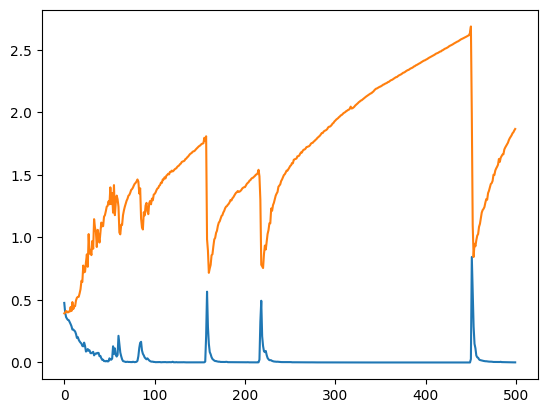

In [23]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

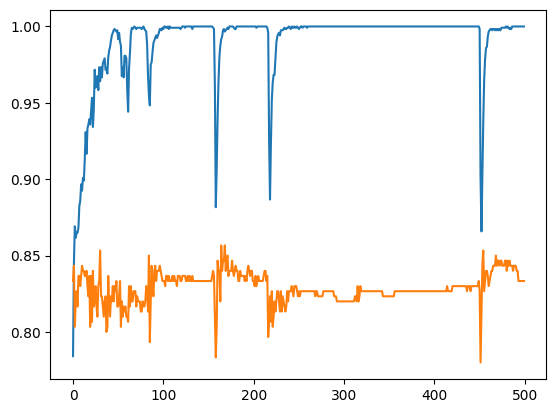

In [24]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

### Model with L1 regularization

In [34]:
model2 = Sequential()

model2.add(Dense(128,input_dim=8, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.009)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.009)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1152      
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17793 (69.50 KB)
Trainable params: 17793 (69.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
38/38 [==============================] - 1s 9ms/step - loss: 3.4004 - accuracy: 0.7283 - val_loss: 1.0873 - val_accuracy: 0.8000
Epoch 2/500
38/38 [==============================] - 0s 4ms/step - loss: 0.8614 - accuracy: 0.8075 - val_loss: 0.7446 - val_accuracy: 0.8267
Epoch 3/500
38/38 [==============================] - 0s 4ms/step - loss: 0.7498 - accuracy: 0.8100 - val_loss: 0.7247 - val_accuracy: 0.8033
Epoch 4/500
38/38 [==============================] - 0s 4ms/step - loss: 0.7286 - accuracy: 0.8033 - val_loss: 0.6890 - val_accuracy: 0.8267
Epoch 5/500
38/38 [==============================] - 0s 4ms/step - loss: 0.6998 - accuracy: 0.8108 - val_loss: 0.6805 - val_accuracy: 0.8300
Epoch 6/500
38/38 [==============================] - 0s 4ms/step - loss: 0.6989 - accuracy: 0.8075 - val_loss: 0.6798 - val_accuracy: 0.8200
Epoch 7/500
38/38 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.8050 - val_loss: 0.6770 - val_accuracy: 0.8133
Epoch 8/500
3

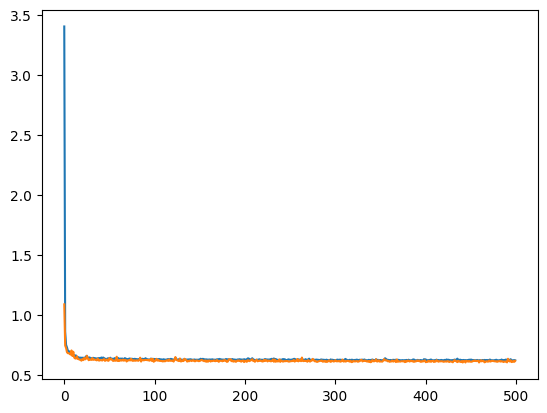

In [36]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

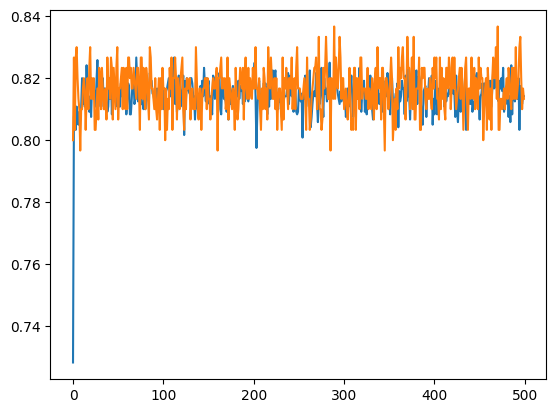

In [37]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

### Model with L2 regularization

In [30]:
model3 = Sequential()

model3.add(Dense(128,input_dim=8, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model3.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model3.add(Dense(1,activation='sigmoid'))

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17793 (69.50 KB)
Trainable params: 17793 (69.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
adam = Adam(learning_rate=0.01)
model3.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history3 = model3.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
38/38 [==============================] - 1s 10ms/step - loss: 1.2088 - accuracy: 0.7800 - val_loss: 0.5423 - val_accuracy: 0.8000
Epoch 2/500
38/38 [==============================] - 0s 5ms/step - loss: 0.5391 - accuracy: 0.7967 - val_loss: 0.4928 - val_accuracy: 0.8300
Epoch 3/500
38/38 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.8000 - val_loss: 0.4980 - val_accuracy: 0.8100
Epoch 4/500
38/38 [==============================] - 0s 4ms/step - loss: 0.4874 - accuracy: 0.8017 - val_loss: 0.4915 - val_accuracy: 0.7933
Epoch 5/500
38/38 [==============================] - 0s 4ms/step - loss: 0.4783 - accuracy: 0.8092 - val_loss: 0.4578 - val_accuracy: 0.8100
Epoch 6/500
38/38 [==============================] - 0s 4ms/step - loss: 0.4813 - accuracy: 0.8092 - val_loss: 0.5409 - val_accuracy: 0.7733
Epoch 7/500
38/38 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.7875 - val_loss: 0.4664 - val_accuracy: 0.8067
Epoch 8/500


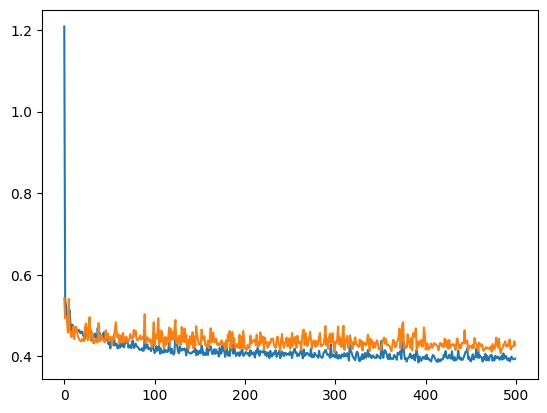

In [32]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

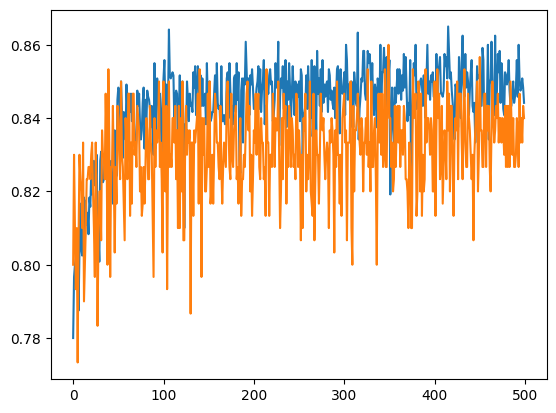

In [33]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])